## Le système de Ptolémée

Au II$^{me}$ siècle, l'astronome grec Ptolémée proposa un model géocentrique qui survivra jusqu'au XVII$^{me}$ siècle.

Dans le système de Ptolémée, la Terre se trouve au centre de l'univers et les autres corps célestes se déplacent le long d'une orbite circulaire de rayon $r$ (épicycle), dont le centre tourne autour de la Terre le long d'une orbite circulaire de rayon $R$ (déférent). 

On décrit le mouvement le long de l'épicycle et du déférent à l'aide des angles $\theta$ et $\phi$ tels que $\dot{\theta}=\omega$ et $\dot{\phi}=\Omega$, avec $\omega$ et $\Omega$, vitesses angulaires constantes et positives.

Quelle est l'allure de la trajectoire en fonction des paramètre $r$, $R$, $\omega$ et $\Omega$?

## Un petit dessin permet de visualiser la situation et les paramètres

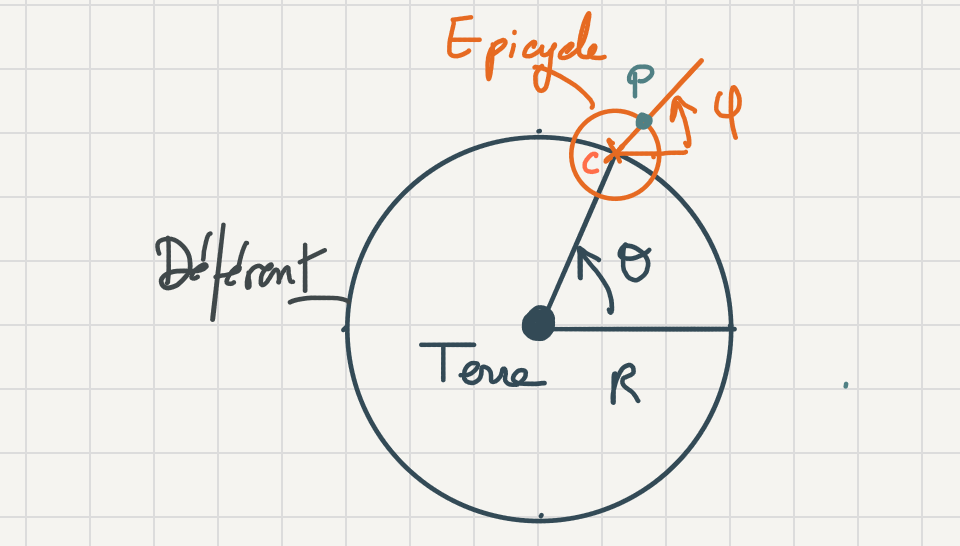

In [2]:
from IPython.display import Image
Image("Ptolemee.png")

## On trace la trajectoire de manière dynamique

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from matplotlib.widgets import Slider

In [4]:
FPS = 40
T = round(2*np.pi/0.2*16*FPS)

# valeurs initiales
w = 10 # omega
W = 1  # Omega
r = 2  # épicycle
R = 10 # déférent

<IPython.core.display.Javascript object>


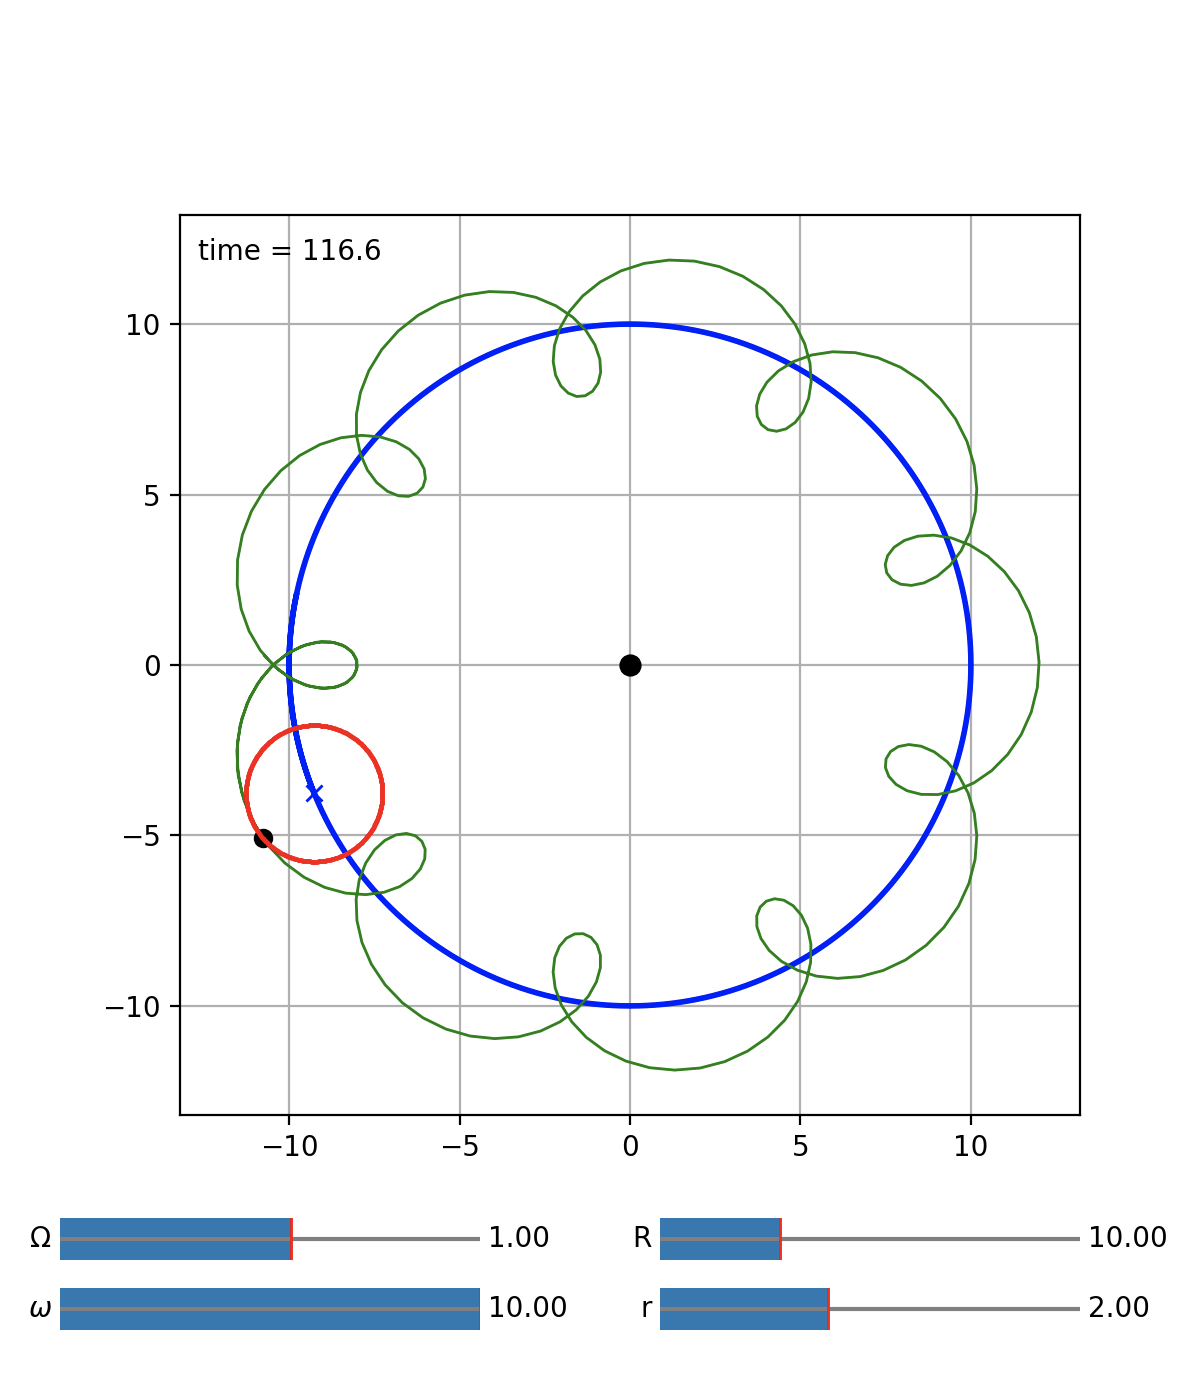

In [5]:
# main figure
fig = plt.figure(figsize=(6,7))
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, position=[.15,.15,.75,.75] )
ax.grid()
ax.set_xlim(-(r+R)*1.1, (r+R)*1.1)
ax.set_ylim(-(r+R)*1.1, (r+R)*1.1)
    
# orbit, epicycle and deferent 
x_e, y_e = [], []  
x_d, y_d = [], []   
orb_x, orb_y = [], [] 

# trajectories of epicycle and deferent 
traj_d, = ax.plot(x_d,y_d, 'b',lw=2)
traj_e, = ax.plot(x_e,y_e,'g',lw=1)

# centers of epicycle and deferent 
d, = ax.plot([], [], 'xb')
e, = ax.plot([], [], 'ok')

# orbits of epicycle and deferent 
orb, = ax.plot([], [], '.r',ms=1)

# time
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


def opt_mem():
    """
    finds the optimal memory for the for the trajectories.
    """
    T1 = 1./(abs(w+W)-.001)
    T2 = 1./(abs(w-W)+.001)
    M = int(4*2*np.pi/min(T1, T2))
    
    if M==T:
        M=int(T/10.)
    return M


def positions(t):
    """
    finds the positions of sun and planet at time t
    """
    X = R*np.cos(W*t) # deferent
    Y = R*np.sin(W*t) # deferent
    x = X + r*np.cos(w*t) # epicycle
    y = Y + r*np.sin(w*t) # epicycle
    return X,Y,x,y

def orbit(X,Y,r):
    """
    computes the orbit of planet around the sun
    """
    phi = np.linspace(0, 2*np.pi, 360*2)
    orb_x = X + r*np.cos(phi)
    orb_y = Y + r*np.sin(phi)
    return orb_x,orb_y


def init():
    """
    initialization function of the animation
    """
    ax.plot([0], ms=7, c='k',marker='o')
    return d,e,traj_d,traj_e

def update(t):
    global r, R, w, W, M
    global x_e, y_e, x_d, y_d
    
    # this is hack to prevent the undesirable jumps
    if (w != s_w.val)+(W != s_W.val)+(r != s_r.val)+(R != s_R.val):
        w = s_w.val
        W = s_W.val
        r = s_r.val
        R = s_R.val
        M = opt_mem()
        ax.set_xlim(-(r+R)*1.1, (r+R)*1.1)
        ax.set_ylim(-(r+R)*1.1, (r+R)*1.1)
        return 
    
    # only keep the recent M-1 positions 
    y_d = y_d[-M+1:]
    x_d = x_d[-M+1:]
    x_e = x_e[-M+1:]
    y_e = y_e[-M+1:]

    # append the current position
    X,Y,x,y = positions(t)
    x_e.append(x)
    y_e.append(y)
    x_d.append(X)
    y_d.append(Y)

    # trajectories and orbit data update
    traj_d.set_data(x_d, y_d)
    traj_e.set_data(x_e, y_e)
    orb.set_data(orbit(X,Y,r))

    # positions update
    d.set_data(X, Y)
    e.set_data(x, y)
    time_text.set_text('time = %.1f' % t)

    return traj_d,traj_e,d,e, orb


# sliders axis
ax_w = plt.axes([0.05, 0.05, 0.35, 0.03],frameon=False)
ax_W = plt.axes([0.05, 0.1, 0.35, 0.03],frameon=False)
ax_r = plt.axes([0.55, 0.05, 0.35, 0.03],frameon=False)
ax_R = plt.axes([0.55, 0.1, 0.35, 0.03],frameon=False)

# just for a better appearance 
for AX in (ax_w, ax_W, ax_r, ax_R):
    AX.hlines(0,-20,20, color='gray')
    AX.grid(True, axis='x')

# slidres
s_w = Slider(ax_w, r'$\omega$', -10, 10, valinit=w, valstep=0.2)
s_W = Slider(ax_W, r'$\Omega$', -10, 10, valinit=W, valstep=0.2)
s_r = Slider(ax_r, r'r', 0, 5, valinit=r, valstep=0.2)
s_R = Slider(ax_R, r'R', 6, 20, valinit=R, valstep=0.2)

s_w.on_changed(update)
s_R.on_changed(update)
s_r.on_changed(update)
s_W.on_changed(update)

def Ptolemee():
    return FuncAnimation(fig, update, frames=np.linspace(0, T, T*FPS),
                        init_func=init, blit=True, interval=1000/FPS)
Ptolemee()

On peut essayer différentes valeurs pour $\Omega$ et $\omega$. 
Le dessin s'efface après un temps: laisser la figure se nettoyer.